In [6]:
%load_ext autoreload
%autoreload 2
import sklearn
from sklearn.datasets import load_wine, load_iris
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler

from einops import rearrange
import numpy as np
import matplotlib.pyplot as plt

from convexlocalisometry.transformation import exponential_transformation
from convexlocalisometry.loss import isometry_loss
from convexlocalisometry.algorithm import greedy, brute, group_basis_pursuit, group_lasso
import random

np.random.seed(1234)
random.seed(1234)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
wine = load_wine()
print(wine.keys())
P_wine, D_wine = wine['data'].shape
print("D_wine", D_wine)
print("P_wine", P_wine)
print(wine['feature_names'])
wine_df = pd.DataFrame(data= wine['data'], columns = wine['feature_names']) # label with class names?
scaler = StandardScaler()
wine_standardized = pd.DataFrame(data = scaler.fit_transform(wine['data']), columns = wine['feature_names'])

iris = load_iris()
print(iris.keys())
P_iris, D_iris = iris['data'].shape

print("D_iris", D_iris)
print("P_iris", P_iris)
print(wine['feature_names'])
iris_df = pd.DataFrame(data= iris['data'], columns = iris['feature_names'])

scaler = StandardScaler()
iris_standardized = pd.DataFrame(data = scaler.fit_transform(iris['data']), columns = iris['feature_names'])


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
D_wine 13
P_wine 178
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
D_iris 4
P_iris 150
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [ ]:
# np.random.seed(1234)
# random.seed(1234)

# losses = []
# nbp = []
# two_stage_losses = []
# random_two_stage_losses= []
# D_iris =4
# for i in range(2):
#     X = iris_standardized.sample(frac = .5).to_numpy().transpose()
# #     X = iris_standardized.sample(axis = 1, frac = .5).to_numpy()
#     output = greedy(X, isometry_loss, D_iris, []) # plainly brute is too hard 178**13 combinations
#     loss = isometry_loss(X[:,output])
#     losses.append(loss)
#     data_transformed = exponential_transformation(X)
#     beta = group_basis_pursuit(data_transformed)
#     basis_pursuit_indices = np.where(np.linalg.norm(beta, axis = 1))[0]
#     nbp.append(len(basis_pursuit_indices))
#     #     two_stage_output = basis_pursuit_indices[np.asarray(greedy(X[:,basis_pursuit_indices], isometry_loss, D_wine, []))] # plainly this is too hard 178**13 combinations
#     two_stage_output = basis_pursuit_indices[np.asarray(brute(X[:,basis_pursuit_indices], isometry_loss, D_iris))] # plainly this is too hard 178**13 combinations
#     two_stage_loss = isometry_loss(X[:,two_stage_output])
#     two_stage_losses.append(two_stage_loss)
#     random_indices = np.random.choice(range(X.shape[1]), len(basis_pursuit_indices), replace=False)
#     random_two_stage_losses.append(isometry_loss(X[:,random_indices]))

In [55]:
iris_standardized.shape

(150, 4)

In [81]:
# pairing = []

# for i in range(X.shape[1]):
#     item_pairing = 
#     for j in range(iris_standardized.shape[0]):
#         if all(iris_standardized.iloc[j,2:4].to_numpy() == X[:,i]):
#             pairing.append([]

In [82]:
np.random.seed(1234)
random.seed(1234)

losses = []
nbp = []
two_stage_losses = []
random_two_stage_losses= []
D_iris = 2
for i in range(2):
    X = iris_standardized.iloc[:,2:4].sample(frac = .5).to_numpy().transpose()
    print(X.shape)
#     X = iris_standardized.sample(axis = 1, frac = .5).to_numpy()
    output = greedy(X, isometry_loss, D_iris, []) # plainly brute is too hard 178**13 combinations
    loss = isometry_loss(X[:,output])
    losses.append(loss)
    data_transformed = exponential_transformation(X)
    beta = group_basis_pursuit(data_transformed)
    basis_pursuit_indices = np.where(np.linalg.norm(beta, axis = 1))[0]
    nbp.append(len(basis_pursuit_indices))
    #     two_stage_output = basis_pursuit_indices[np.asarray(greedy(X[:,basis_pursuit_indices], isometry_loss, D_wine, []))] # plainly this is too hard 178**13 combinations
    two_stage_output = basis_pursuit_indices[np.asarray(brute(X[:,basis_pursuit_indices], isometry_loss, D_iris))] # plainly this is too hard 178**13 combinations
    two_stage_loss = isometry_loss(X[:,two_stage_output])
    two_stage_losses.append(two_stage_loss)
    random_indices = np.random.choice(range(X.shape[1]), len(basis_pursuit_indices), replace=False)
    random_two_stage_losses.append(isometry_loss(X[:,random_indices]))

(2, 75)


/Users/samsonkoelle/miniconda3/envs/isometry/lib/python3.10/site-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computing brute force solution for dictionary dimension 3 and target_dimension 2


3it [00:00, 10163.90it/s]


(2, 75)
Computing brute force solution for dictionary dimension 3 and target_dimension 2


3it [00:00, 9525.29it/s]


In [85]:
loss, two_stage_loss

(2.847523794459459, 2.9411383305603933)

In [91]:
print(output, basis_pursuit_indices)
interesting_indices = [54,29,23,50]
X = X[:,interesting_indices]
X.shape

[54, 29] [23 29 50]


(2, 4)

In [111]:
greedy(data_transformed.transpose(), isometry_loss, D_iris, [])

[0, 2]

In [112]:
X

array([[5.92245988e-01, 1.04694540e+00, 5.35408562e-01, 4.21733708e-01],
       [7.90670654e-01, 2.64141916e-01, 8.77547895e-04, 6.59038469e-01]])

In [107]:
X = X.transpose()
# data_transformed = data_transformed.transpose()

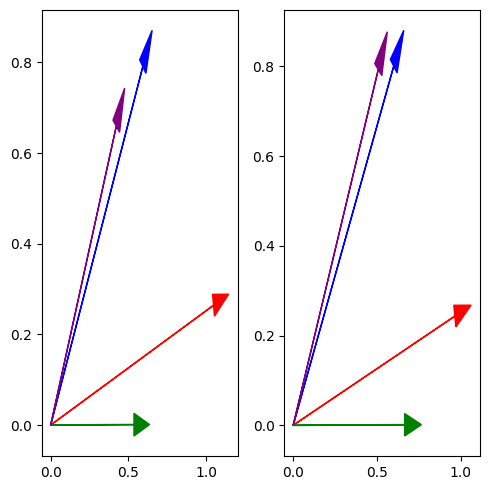

In [109]:
import matplotlib.pyplot as plt
# Adjusting the layout to have two columns, one for data and one for betas
fig, axes = plt.subplots(1, 2, figsize=(5, 5))

# Plot data on the left (first 10 subplots)

axes[0].arrow(0, 0, X[0, 0], X[1,0], head_width=0.05, head_length=0.1, fc='blue', ec='blue')
axes[0].arrow(0, 0, X[0,1], X[1,1], head_width=0.05, head_length=0.1, fc='red', ec='red')    
axes[0].arrow(0, 0, X[0,2], X[1,2], head_width=0.05, head_length=0.1, fc='green', ec='green')
axes[0].arrow(0, 0, X[0,3], X[1,3], head_width=0.05, head_length=0.1, fc='purple', ec='purple')

axes[1].arrow(0, 0, data_transformed[0, 0], data_transformed[0,1], head_width=0.05, head_length=0.1, fc='blue', ec='blue')
axes[1].arrow(0, 0, data_transformed[1, 0], data_transformed[1,1], head_width=0.05, head_length=0.1, fc='red', ec='red')    
axes[1].arrow(0, 0, data_transformed[2,0], data_transformed[2,1], head_width=0.05, head_length=0.1, fc='green', ec='green')
axes[1].arrow(0, 0, data_transformed[3,0], data_transformed[3,1], head_width=0.05, head_length=0.1, fc='purple', ec='purple')

plt.tight_layout()
plt.show()

In [ ]:
# does it always beat greedy on the same data?  since the losses are fundamentally not the same, even with perfect recovery it seems sus.

# what if we have the same vector after normalization?  One is slightly too big, the other a bit too small.


In [92]:

output = greedy(X, isometry_loss, D_iris, []) # plainly brute is too hard 178**13 combinations
loss = isometry_loss(X[:,output])
losses.append(loss)
data_transformed = exponential_transformation(X)
beta = group_basis_pursuit(data_transformed)
basis_pursuit_indices = np.where(np.linalg.norm(beta, axis = 1))[0]
nbp.append(len(basis_pursuit_indices))
#     two_stage_output = basis_pursuit_indices[np.asarray(greedy(X[:,basis_pursuit_indices], isometry_loss, D_wine, []))] # plainly this is too hard 178**13 combinations
two_stage_output = basis_pursuit_indices[np.asarray(brute(X[:,basis_pursuit_indices], isometry_loss, D_iris))] # plainly this is too hard 178**13 combinations
two_stage_loss = isometry_loss(X[:,two_stage_output])
two_stage_losses.append(two_stage_loss)
random_indices = np.random.choice(range(X.shape[1]), len(basis_pursuit_indices), replace=False)
random_two_stage_losses.append(isometry_loss(X[:,random_indices]))

/Users/samsonkoelle/miniconda3/envs/isometry/lib/python3.10/site-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computing brute force solution for dictionary dimension 3 and target_dimension 2


3it [00:00, 15887.52it/s]


In [113]:
from convexlocalisometry.loss import group_lasso_norm

In [124]:
norms = np.zeros((X.shape[1],X.shape[1]))

for i in range(X.shape[1]):
    for j in range(X.shape[1]):
        norms[i,j] = group_lasso_norm(X[:,np.asarray([i,j])])

In [130]:
data_transformed = data_transformed.transpose()

In [158]:
norms = np.zeros((data_transformed.shape[1],data_transformed.shape[1]))

for i in range(data_transformed.shape[1]):
    for j in range(data_transformed.shape[1]):
        if i != j:
            norms[i,j] = group_lasso_norm(np.linalg.inv(data_transformed[:,np.asarray([i,j])]))

In [161]:
norms = np.zeros((data_transformed.shape[1],data_transformed.shape[1]))

for i in range(data_transformed.shape[1]):
    for j in range(data_transformed.shape[1]):
        if i != j:
            norms[i,j] = isometry_loss(data_transformed[:,np.asarray([i,j])])

<Axes: >

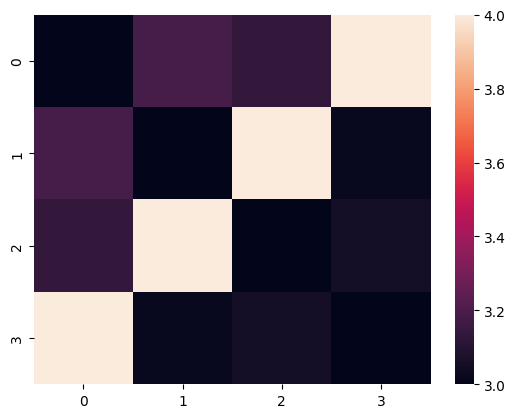

In [159]:
sns.heatmap(norms, vmin=3, vmax=4)

# it has to be contained within the solution because its a convex set and its an average?

In [143]:
norms = np.zeros((data_transformed.shape[1],data_transformed.shape[1]))

for i in range(data_transformed.shape[1]):
    for j in range(data_transformed.shape[1]):
        if j !=i:
            norms[i,j] = isometry_loss(X[:,np.asarray([i,j])])

<Axes: >

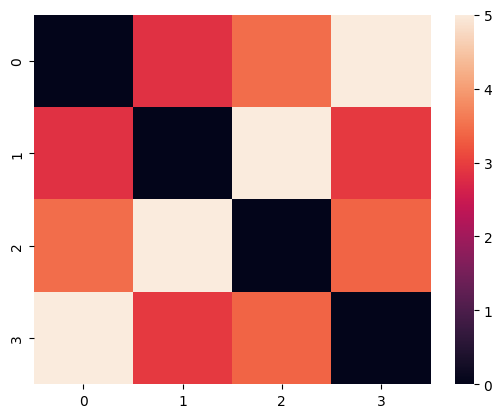

In [147]:
sns.heatmap(norms, vmin = 0, vmax= 5)

In [ ]:
output = greedy(X, isometry_loss, D_iris, []) # plainly brute is too hard 178**13 combinations
loss = isometry_loss(X[:,output])
losses.append(loss)
data_transformed = exponential_transformation(X)
beta = group_basis_pursuit(data_transformed)
basis_pursuit_indices = np.where(np.linalg.norm(beta, axis = 1))[0]
nbp.append(len(basis_pursuit_indices))
#     two_stage_output = basis_pursuit_indices[np.asarray(greedy(X[:,basis_pursuit_indices], isometry_loss, D_wine, []))] # plainly this is too hard 178**13 combinations
two_stage_output = basis_pursuit_indices[np.asarray(brute(X[:,basis_pursuit_indices], isometry_loss, D_iris))] # plainly this is too hard 178**13 combinations
two_stage_loss = isometry_loss(X[:,two_stage_output])
two_stage_losses.append(two_stage_loss)
random_indices = np.random.choice(range(X.shape[1]), len(basis_pursuit_indices), replace=False)
random_two_stage_losses.append(isometry_loss(X[:,random_indices]))

In [25]:
loss # greedy has its own distribution by ordering strategy.
# its not guaranteed greedy would always work this well on this data

2.847523794459459

In [26]:
two_stage_loss

2.9411383305603933

In [25]:
beta = group_basis_pursuit(data_transformed[:,basis_pursuit_indices])

/Users/samsonkoelle/miniconda3/envs/isometry/lib/python3.10/site-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [21]:
set(output) in set(basis_pursuit_indices)

False

In [27]:
basis_pursuit_indices

array([23, 29, 50])

In [28]:
np.where(np.asarray(losses ) < np.asarray(two_stage_losses))

(array([1]),)

<Axes: >

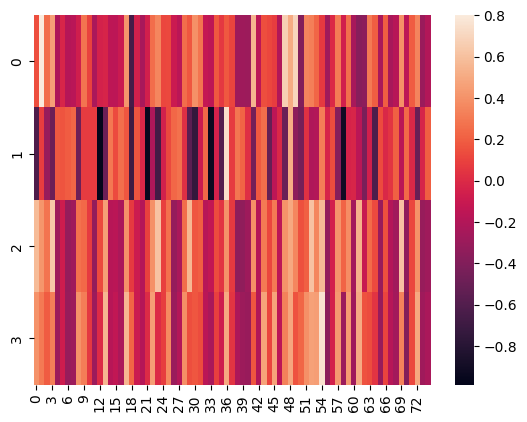

In [24]:
sns.heatmap(data_transformed)

In [15]:
np.linalg.norm(data_transformed, axis = 0)

array([0.94973706, 0.95549665, 0.52690181, 0.97252159, 0.49381049,
       0.19861288, 0.52092949, 0.49567494, 0.69148579, 0.49192562,
       0.15223171, 0.49818026, 0.99627126, 0.86751595, 0.41865813,
       0.29553497, 0.42627713, 0.81665013, 0.97651161, 0.21398798,
       0.36418705, 0.96493347, 0.68846957, 0.97636521, 0.17617198,
       0.48217101, 0.50776356, 0.43399939, 0.52834699, 0.82647491,
       0.87484025, 0.37864259, 0.36267868, 0.98942675, 0.24098598,
       0.59936964, 0.99707646, 0.1525693 , 0.57780481, 0.57027947,
       0.51260885, 0.83395665, 0.36424109, 0.62783625, 0.55545543,
       0.58618977, 0.30166648, 0.97549131, 0.99295511, 0.866993  ,
       0.65463619, 0.56465692, 0.86008399, 0.64545806, 0.99820399,
       0.56826727, 0.15595735, 0.76803222, 0.98558423, 0.63354416,
       0.45381151, 0.84102906, 0.58972471, 0.41844871, 0.66346671,
       0.50878454, 0.27095358, 0.35862265, 0.46461162, 0.81850665,
       0.60044733, 0.25507067, 0.88060906, 0.51543215, 0.45961

In [ ]:
sns.heatmap(X)

In [7]:
print(np.mean(losses))
print(np.std(losses))  # Standard deviation
print(np.mean(two_stage_losses))
print(np.std(two_stage_losses))  # Standard deviation
print(np.mean(nbp))
print(np.std(nbp))  # Standard deviation

13.418240043748304
6.421590347988552
7.980094602761592
1.8257606867668987
7.0
0.938083151964686


In [8]:
print(np.mean(nbp))
print(np.std(nbp))  # Standard deviation

7.0
0.938083151964686


In [9]:
from scipy import stats

t_statistic, p_value = stats.ttest_rel(losses, two_stage_losses)


In [10]:
print(p_value)

0.00019227762964308477


In [18]:
# losses = []
# two_stage_losses = []
# random_two_stage_losses= []
# for i in range(1):
#     X = wine_standardized.sample(frac = .5).to_numpy().transpose()
#     output = greedy(X, isometry_loss, D_iris, []) # plainly brute is too hard 178**13 combinations
#     loss = isometry_loss(X[:,output])
#     losses.append(loss)
#     data_transformed = exponential_transformation(X)
#     beta = group_basis_pursuit(data_transformed)
#     basis_pursuit_indices = np.where(np.linalg.norm(beta, axis = 1))[0]
#     two_stage_output = basis_pursuit_indices[np.asarray(brute(X[:,basis_pursuit_indices], isometry_loss, D_iris))] # plainly this is too hard 178**13 combinations
#     two_stage_loss = isometry_loss(X[:,two_stage_output])
#     two_stage_losses.append(two_stage_loss)
#     random_indices = np.random.choice(range(X.shape[1]), len(basis_pursuit_indices), replace=False)
#     random_two_stage_losses.append(isometry_loss(X[:,random_indices]))

In [11]:
losses = []
two_stage_losses = []
nbp = []
random_two_stage_losses= []
dimension = 5
for i in range(25):
    X = wine_standardized.sample(frac = .5).to_numpy().transpose()[:dimension,:]
    output = greedy(X, isometry_loss, dimension, []) # plainly brute is too hard 178**13 combinations
#     output = brute(X, isometry_loss, dimension)
    loss = isometry_loss(X[:,output])
    losses.append(loss)
    data_transformed = exponential_transformation(X)
    beta = group_basis_pursuit(data_transformed)
    basis_pursuit_indices = np.where(np.linalg.norm(beta, axis = 1))[0]
    nbp.append(len(basis_pursuit_indices))

    two_stage_output = basis_pursuit_indices[np.asarray(brute(X[:,basis_pursuit_indices], isometry_loss, dimension))] # plainly this is too hard 178**13 combinations
    two_stage_loss = isometry_loss(X[:,two_stage_output])
    two_stage_losses.append(two_stage_loss)
    random_indices = np.random.choice(range(X.shape[1]), len(basis_pursuit_indices), replace=False)
    random_two_stage_losses.append(isometry_loss(X[:,random_indices]))

Computing brute force solution for dictionary dimension 14 and target_dimension 5


2002it [00:00, 26528.87it/s]


Computing brute force solution for dictionary dimension 12 and target_dimension 5


792it [00:00, 23007.16it/s]


Computing brute force solution for dictionary dimension 10 and target_dimension 5


252it [00:00, 19553.14it/s]


Computing brute force solution for dictionary dimension 10 and target_dimension 5


252it [00:00, 24077.74it/s]


Computing brute force solution for dictionary dimension 11 and target_dimension 5


462it [00:00, 23134.50it/s]


Computing brute force solution for dictionary dimension 12 and target_dimension 5


792it [00:00, 28459.59it/s]


Computing brute force solution for dictionary dimension 13 and target_dimension 5


1287it [00:00, 26335.64it/s]


Computing brute force solution for dictionary dimension 12 and target_dimension 5


792it [00:00, 22148.88it/s]


Computing brute force solution for dictionary dimension 13 and target_dimension 5


1287it [00:00, 28444.58it/s]


Computing brute force solution for dictionary dimension 11 and target_dimension 5


462it [00:00, 23639.11it/s]


Computing brute force solution for dictionary dimension 12 and target_dimension 5


792it [00:00, 27859.78it/s]


Computing brute force solution for dictionary dimension 12 and target_dimension 5


792it [00:00, 24887.72it/s]


Computing brute force solution for dictionary dimension 13 and target_dimension 5


1287it [00:00, 26830.44it/s]


Computing brute force solution for dictionary dimension 12 and target_dimension 5


792it [00:00, 26994.06it/s]


Computing brute force solution for dictionary dimension 13 and target_dimension 5


1287it [00:00, 28487.96it/s]


Computing brute force solution for dictionary dimension 13 and target_dimension 5


1287it [00:00, 26794.61it/s]


Computing brute force solution for dictionary dimension 11 and target_dimension 5


462it [00:00, 23130.08it/s]


Computing brute force solution for dictionary dimension 10 and target_dimension 5


252it [00:00, 20410.24it/s]


Computing brute force solution for dictionary dimension 10 and target_dimension 5


252it [00:00, 23875.41it/s]


Computing brute force solution for dictionary dimension 11 and target_dimension 5


462it [00:00, 26091.57it/s]


Computing brute force solution for dictionary dimension 12 and target_dimension 5


792it [00:00, 23048.50it/s]


Computing brute force solution for dictionary dimension 13 and target_dimension 5


1287it [00:00, 23836.43it/s]


Computing brute force solution for dictionary dimension 10 and target_dimension 5


252it [00:00, 25861.62it/s]


Computing brute force solution for dictionary dimension 13 and target_dimension 5


1287it [00:00, 25351.74it/s]


Computing brute force solution for dictionary dimension 9 and target_dimension 5


126it [00:00, 19114.67it/s]


In [12]:
print(np.mean(losses))
print(np.std(losses))  # Standard deviation
print(np.mean(two_stage_losses))
print(np.std(two_stage_losses))  # Standard deviation
print(np.mean(nbp))
print(np.std(nbp))  # Standard deviation

5.748351077582056
0.20906514073788146
5.572803145225201
0.1075232804940342
11.68
1.2874781551544865


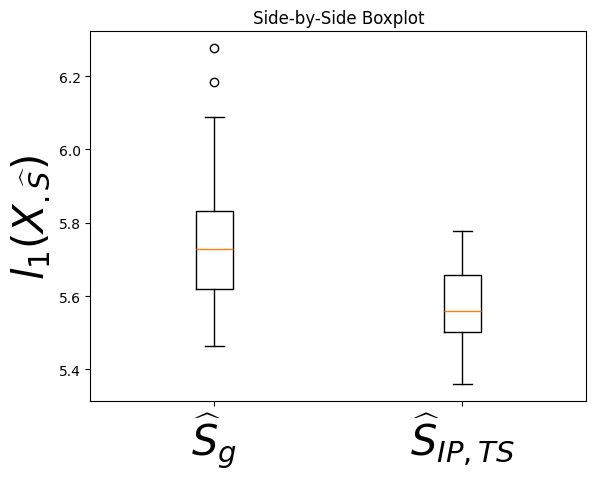

In [13]:
import matplotlib.pyplot as plt

data = [losses, two_stage_losses]
plt.boxplot(data)
plt.xticks([1, 2], [r'$\widehat S_{g}$', r'$\widehat S_{IP,TS}$'], fontsize=30)
plt.title('Side-by-Side Boxplot')
plt.ylabel('Values')
plt.ylabel(r'$l_1(X_{.\widehat {S}})$', fontsize = 30)
plt.savefig('/Users/samsonkoelle/convexlocalisometry/figures/Figure2b')

In [14]:
from scipy import stats

t_statistic, p_value = stats.ttest_rel(losses, two_stage_losses)


In [15]:
p_value

4.957758840665814e-05

In [30]:
iris_standardized.shape

(150, 4)